In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import re
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
csv_inicial = pd.read_csv('salaries.csv', sep = ',', encoding = 'UTF-8')

In [3]:
csv_inicial

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,90000,USD,90000,AE,0,AE,L
1,2024,SE,FT,Machine Learning Engineer,180500,USD,180500,US,0,US,M
2,2024,SE,FT,Machine Learning Engineer,96200,USD,96200,US,0,US,M
3,2024,SE,FT,Machine Learning Engineer,235000,USD,235000,AU,0,AU,M
4,2024,SE,FT,Machine Learning Engineer,175000,USD,175000,AU,0,AU,M
...,...,...,...,...,...,...,...,...,...,...,...
13967,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
13968,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
13969,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
13970,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


work_year : The year the salary was paid.

experience_level : The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director

employment_type : The type of employement for the role: PT Part-time FT
Full-time CT Contract FL Freelance

job_title : The role worked in during the year.

salary : The total gross salary amount paid.

salary_currency : The currency of the salary paid as an ISO 4217 currency code.

salary_in_usd : The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).

employee_residence : Employee's primary country of residence in during the work year as an ISO 3166 country code.

remote_ratio : The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)

company_location : The country of the employer's main office or contracting branch as an ISO 3166 country code.

company_size : The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

In [4]:
csv_inicial.count()

work_year             13972
experience_level      13972
employment_type       13972
job_title             13972
salary                13972
salary_currency       13972
salary_in_usd         13972
employee_residence    13972
remote_ratio          13972
company_location      13972
company_size          13972
dtype: int64

In [5]:
csv_inicial.groupby('employment_type').size()

employment_type
CT       26
FL       12
FT    13912
PT       22
dtype: int64

In [6]:
experiencia = {'EN':0, 'MI':1, 'SE': 2, 'EX':3} #EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director
csv_inicial['experience_level'] = [ experiencia[csv_inicial['experience_level'][i]] for i in range(csv_inicial['experience_level'].count())]
csv_inicial.groupby('experience_level').size()

experience_level
0    1027
1    3294
2    9248
3     403
dtype: int64

In [7]:
tipo = {'CT':0, 'FL':1, 'FT': 2, 'PT':3} #PT Part-time FT Full-time CT Contract FL Freelance
csv_inicial['employment_type'] = [ tipo[csv_inicial['employment_type'][i]] for i in range(csv_inicial['employment_type'].count())]
csv_inicial.groupby('employment_type').size()

employment_type
0       26
1       12
2    13912
3       22
dtype: int64

In [8]:
df_tipo = pd.value_counts(csv_inicial['employment_type']).to_frame(name='fabs').rename_axis('tipo').sort_index()
df_tipo['frel'] = (pd.value_counts(csv_inicial['employment_type']) / len(csv_inicial['employment_type']))*100
df_tipo

,fabs,frel
tipo,,
0,26,0.186086
1,12,0.085886
2,13912,99.570570
3,22,0.157458


In [9]:
df_loc = pd.value_counts(csv_inicial['company_location']).to_frame(name='fabs').rename_axis('tipo').sort_index()
df_loc['frel'] = (pd.value_counts(csv_inicial['company_location']) / len(csv_inicial['company_location']))*100
df_loc

,fabs,frel
tipo,,
AD,1,0.007157
AE,4,0.028629
AM,1,0.007157
AR,7,0.050100
AS,3,0.021472
...,...,...
TR,6,0.042943
UA,10,0.071572
US,12220,87.460636


In [10]:
df_loc = pd.value_counts(csv_inicial['company_size']).to_frame(name='fabs').rename_axis('tipo').sort_index()
df_loc['frel'] = (pd.value_counts(csv_inicial['company_size']) / len(csv_inicial['company_size']))*100
df_loc

,fabs,frel
tipo,,
L,963,6.892356
M,12831,91.833667
S,178,1.273977


In [11]:
csv_inicial.describe()

,work_year,experience_level,employment_type,salary,salary_in_usd,remote_ratio
count,13972.000000,13972.000000,13972.000000,1.397200e+04,13972.000000,13972.000000
mean,2023.085600,1.646078,1.996994,1.660011e+05,150028.812124,33.334526
std,0.687612,0.658322,0.099341,3.661545e+05,68634.306349,46.682931
min,2020.000000,0.000000,0.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.000000,2.000000,1.040000e+05,103000.000000,0.000000
50%,2023.000000,2.000000,2.000000,1.422000e+05,141600.000000,0.000000
75%,2024.000000,2.000000,2.000000,1.880000e+05,185900.000000,100.000000
max,2024.000000,3.000000,3.000000,3.040000e+07,800000.000000,100.000000


In [12]:
csv_inicial.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [13]:
csv_inicial.duplicated().sum()

5378

In [14]:
csv_inicial.drop_duplicates(keep='first', inplace=True) # remoção de registros duplicados
csv_inicial.dropna(inplace=True)
csv_inicial.count()

work_year             8594
experience_level      8594
employment_type       8594
job_title             8594
salary                8594
salary_currency       8594
salary_in_usd         8594
employee_residence    8594
remote_ratio          8594
company_location      8594
company_size          8594
dtype: int64

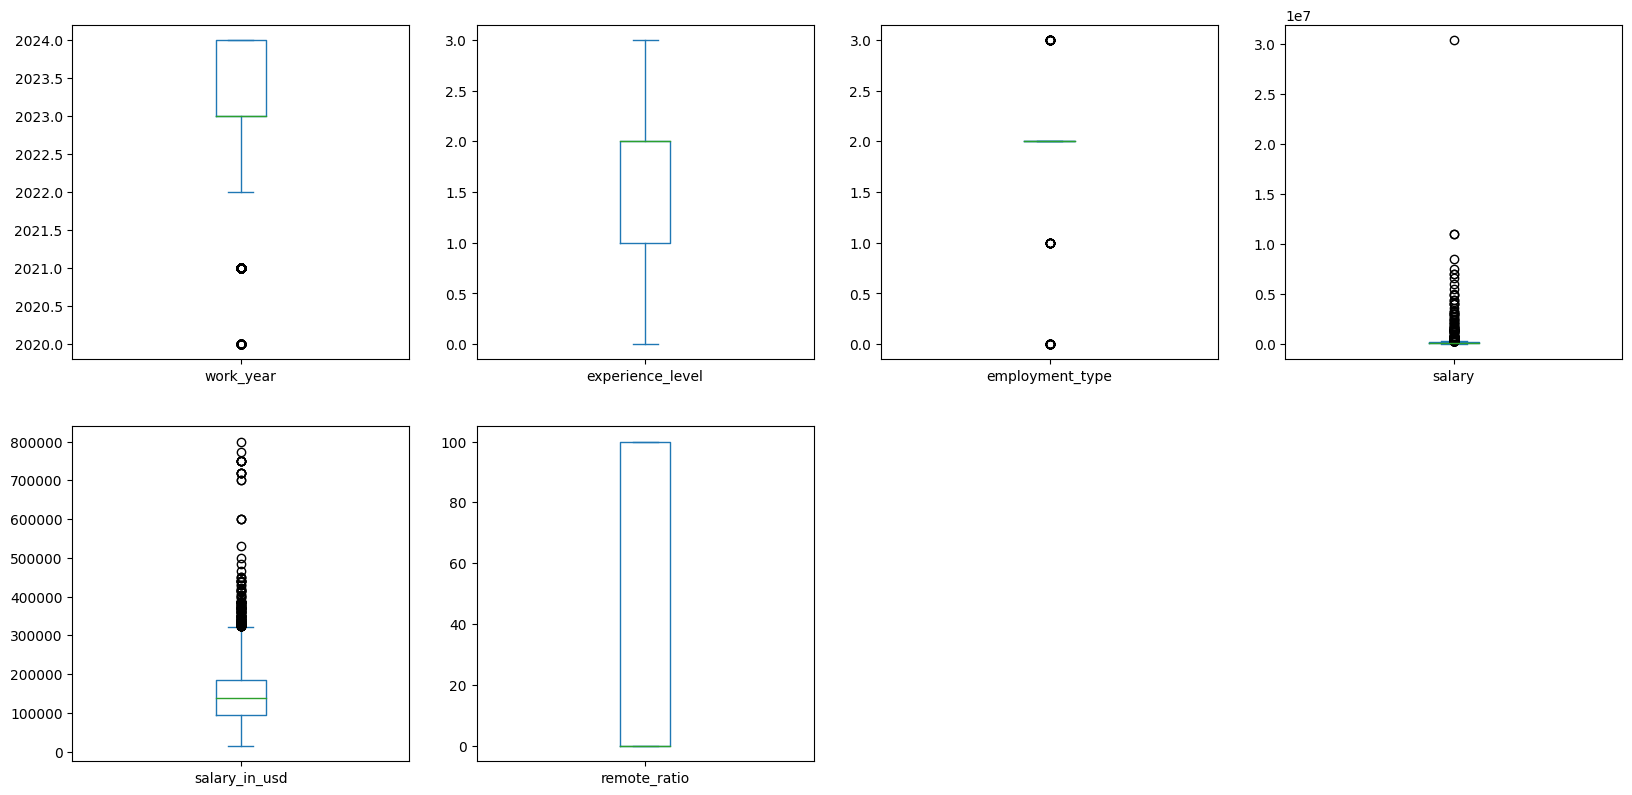

In [15]:
csv_inicial.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False, figsize=(20,20))

plt.show()

In [16]:
# como os dados estão desbalanceados serão utilizadados apenas Dados dos US com tipo de emprego sendo 2/Full Time e tirando os salarios outliers acima de 300.000 dolares
csv_inicial = csv_inicial.loc[(csv_inicial['company_location'] == 'US') & (csv_inicial['employment_type'] == 2) & (csv_inicial['company_size'] == 'M') & (csv_inicial['salary_in_usd'] <= 300000)]; csv_inicial.count()# & (csv_inicial['salary_in_usd'] <= 300000)

work_year             6445
experience_level      6445
employment_type       6445
job_title             6445
salary                6445
salary_currency       6445
salary_in_usd         6445
employee_residence    6445
remote_ratio          6445
company_location      6445
company_size          6445
dtype: int64

In [17]:
csv_inicial.drop(columns=['company_location','employment_type', 'company_size','salary_currency','employee_residence', 'salary','job_title'], inplace=True); csv_inicial.count()#dropando as colunas não usadas

work_year           6445
experience_level    6445
salary_in_usd       6445
remote_ratio        6445
dtype: int64

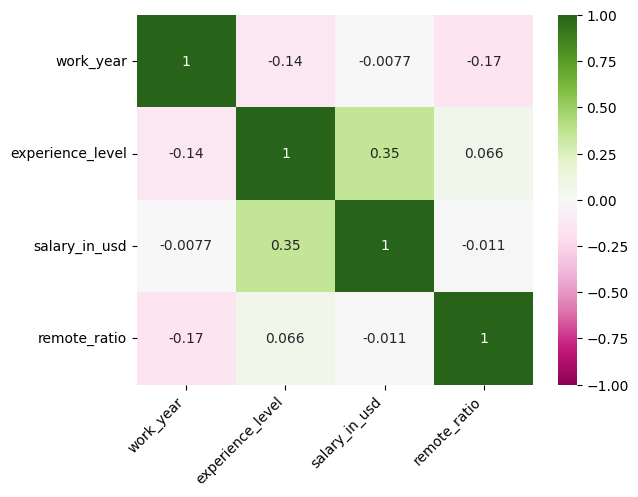

In [18]:
ax = sns.heatmap(csv_inicial.corr(), vmin=-1, vmax=1, center=0, annot=True, cmap = "PiYG")
sns.set(rc={'figure.figsize':(18,18)})
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45, # rotaciona o eixo y 45o
    horizontalalignment='right'
);

In [19]:
csv_inicial.corr(method = 'pearson')

,work_year,experience_level,salary_in_usd,remote_ratio
work_year,1.000000,-0.135041,-0.007727,-0.168361
experience_level,-0.135041,1.000000,0.354167,0.066431
salary_in_usd,-0.007727,0.354167,1.000000,-0.010617
remote_ratio,-0.168361,0.066431,-0.010617,1.000000


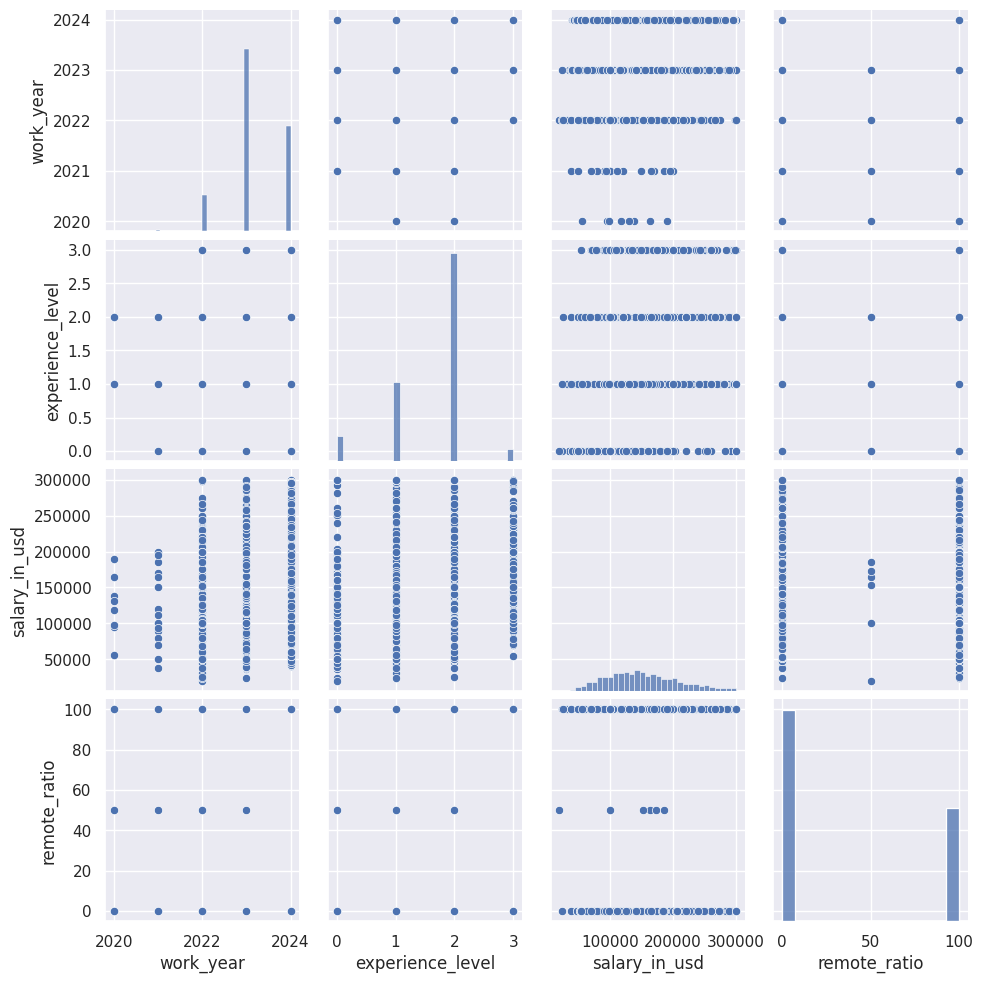

In [20]:
sns.pairplot(csv_inicial)

In [21]:
csv_inicial.dtypes

work_year           int64
experience_level    int64
salary_in_usd       int64
remote_ratio        int64
dtype: object

In [22]:
csv_inicial.reset_index(drop=True)

,work_year,experience_level,salary_in_usd,remote_ratio
0,2024,2,180500,0
1,2024,2,96200,0
2,2024,1,95413,100
3,2024,1,70692,100
4,2024,2,222300,0
...,...,...,...,...
6440,2021,2,165000,0
6441,2020,2,190200,100
6442,2020,1,118000,100
6443,2020,1,138350,100


<Axes: >

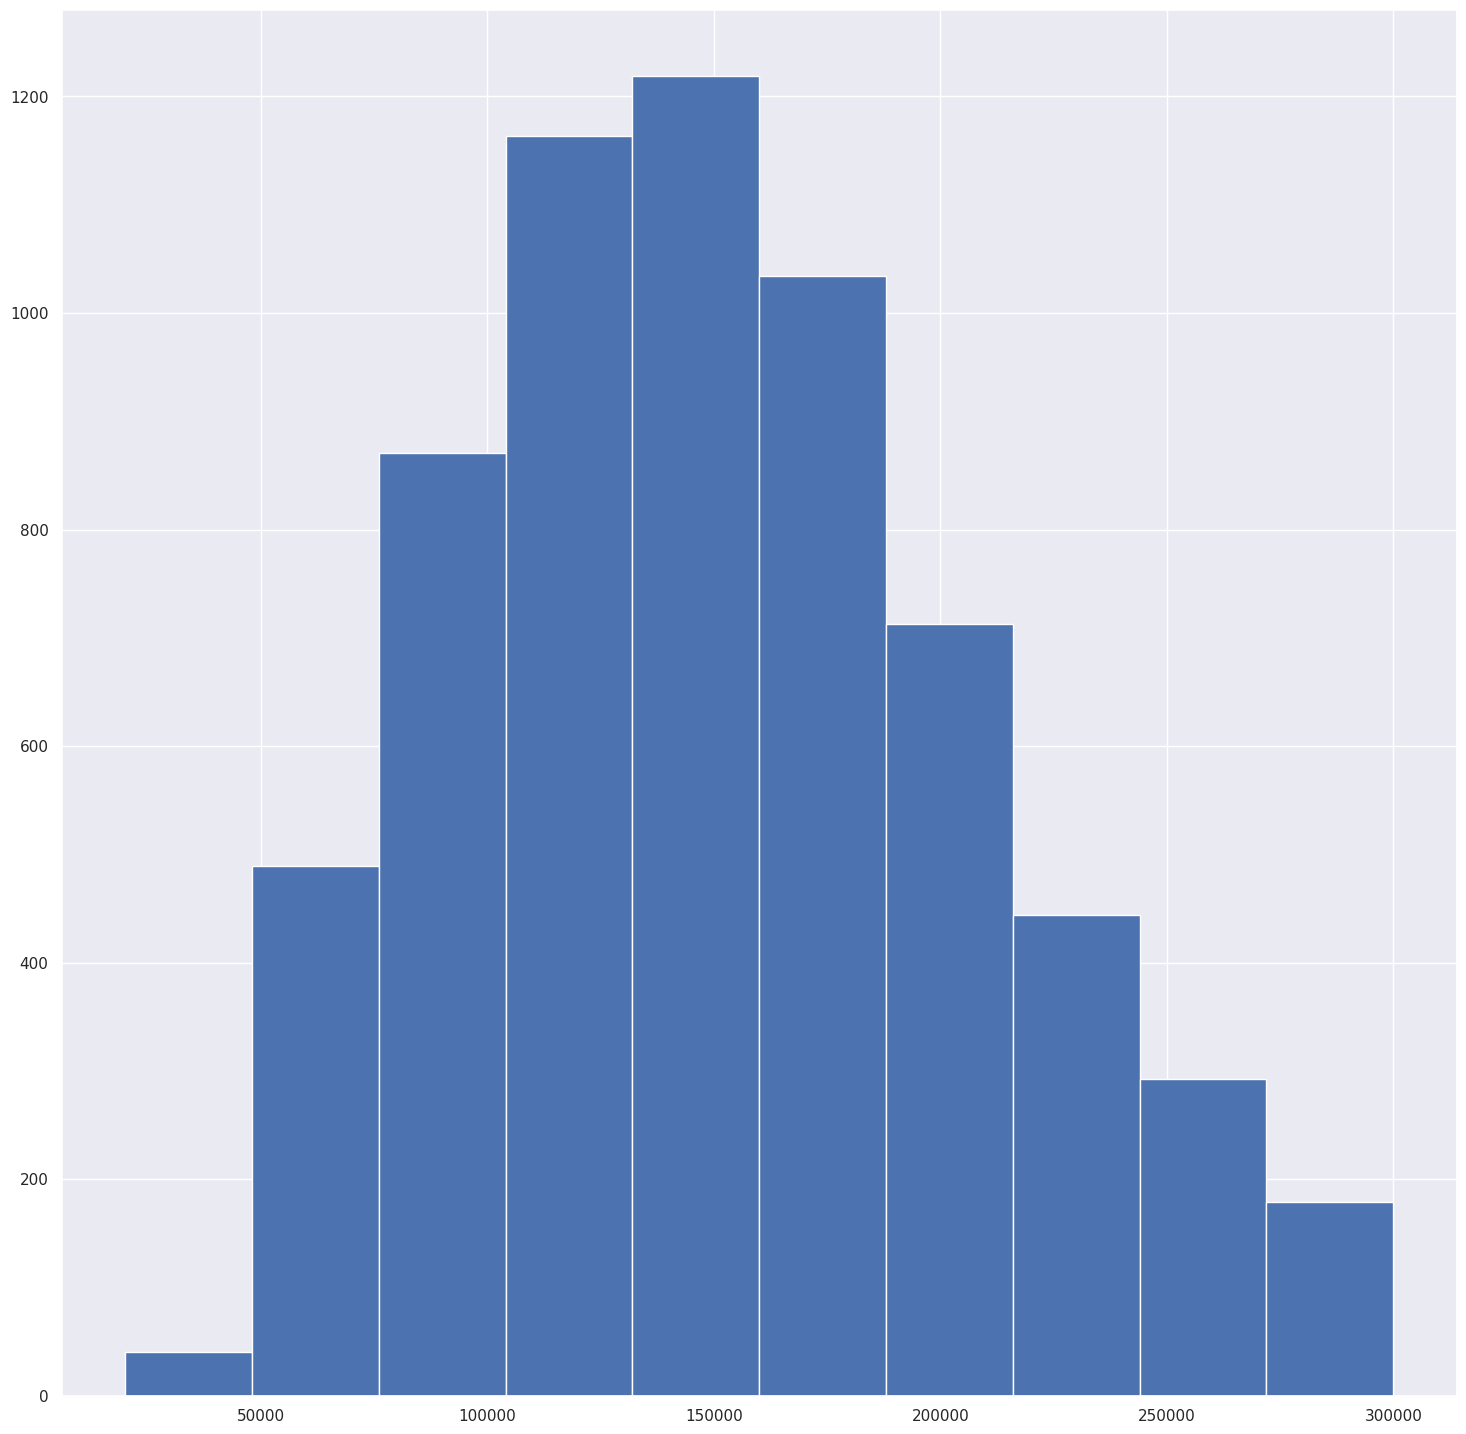

In [23]:
csv_inicial.salary_in_usd.hist()

In [24]:
csv_inicial.skew()

work_year          -0.400241
experience_level   -0.893324
salary_in_usd       0.396504
remote_ratio        0.631800
dtype: float64

In [25]:
csv_inicial.to_csv("salaries_pos_exploracao.csv", index=False) # salvando dataset tratado

In [26]:
csv_pos_exploracao = pd.read_csv('salaries_pos_exploracao.csv', sep = ',', encoding = 'UTF-8')

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [28]:
# deixando o salario como ultima coluna
cols = csv_pos_exploracao.columns.tolist()
cols_salvo = cols[0:2] + cols[3:]
cols_salvo.append(cols[2])

In [29]:
cols_salvo

['work_year', 'experience_level', 'remote_ratio', 'salary_in_usd']

In [30]:
csv_pos_exploracao = csv_pos_exploracao[cols_salvo]; csv_pos_exploracao.head(3)

,work_year,experience_level,remote_ratio,salary_in_usd
0,2024,2,0,180500
1,2024,2,0,96200
2,2024,1,100,95413


In [31]:
colunas = csv_pos_exploracao.shape[1]; colunas

4

In [32]:
array = csv_pos_exploracao.values
X = array[:,0:(colunas-1)]
Y = array[:,(colunas-1)]

In [33]:
Y

array([180500,  96200,  95413, ..., 118000, 138350, 130800])

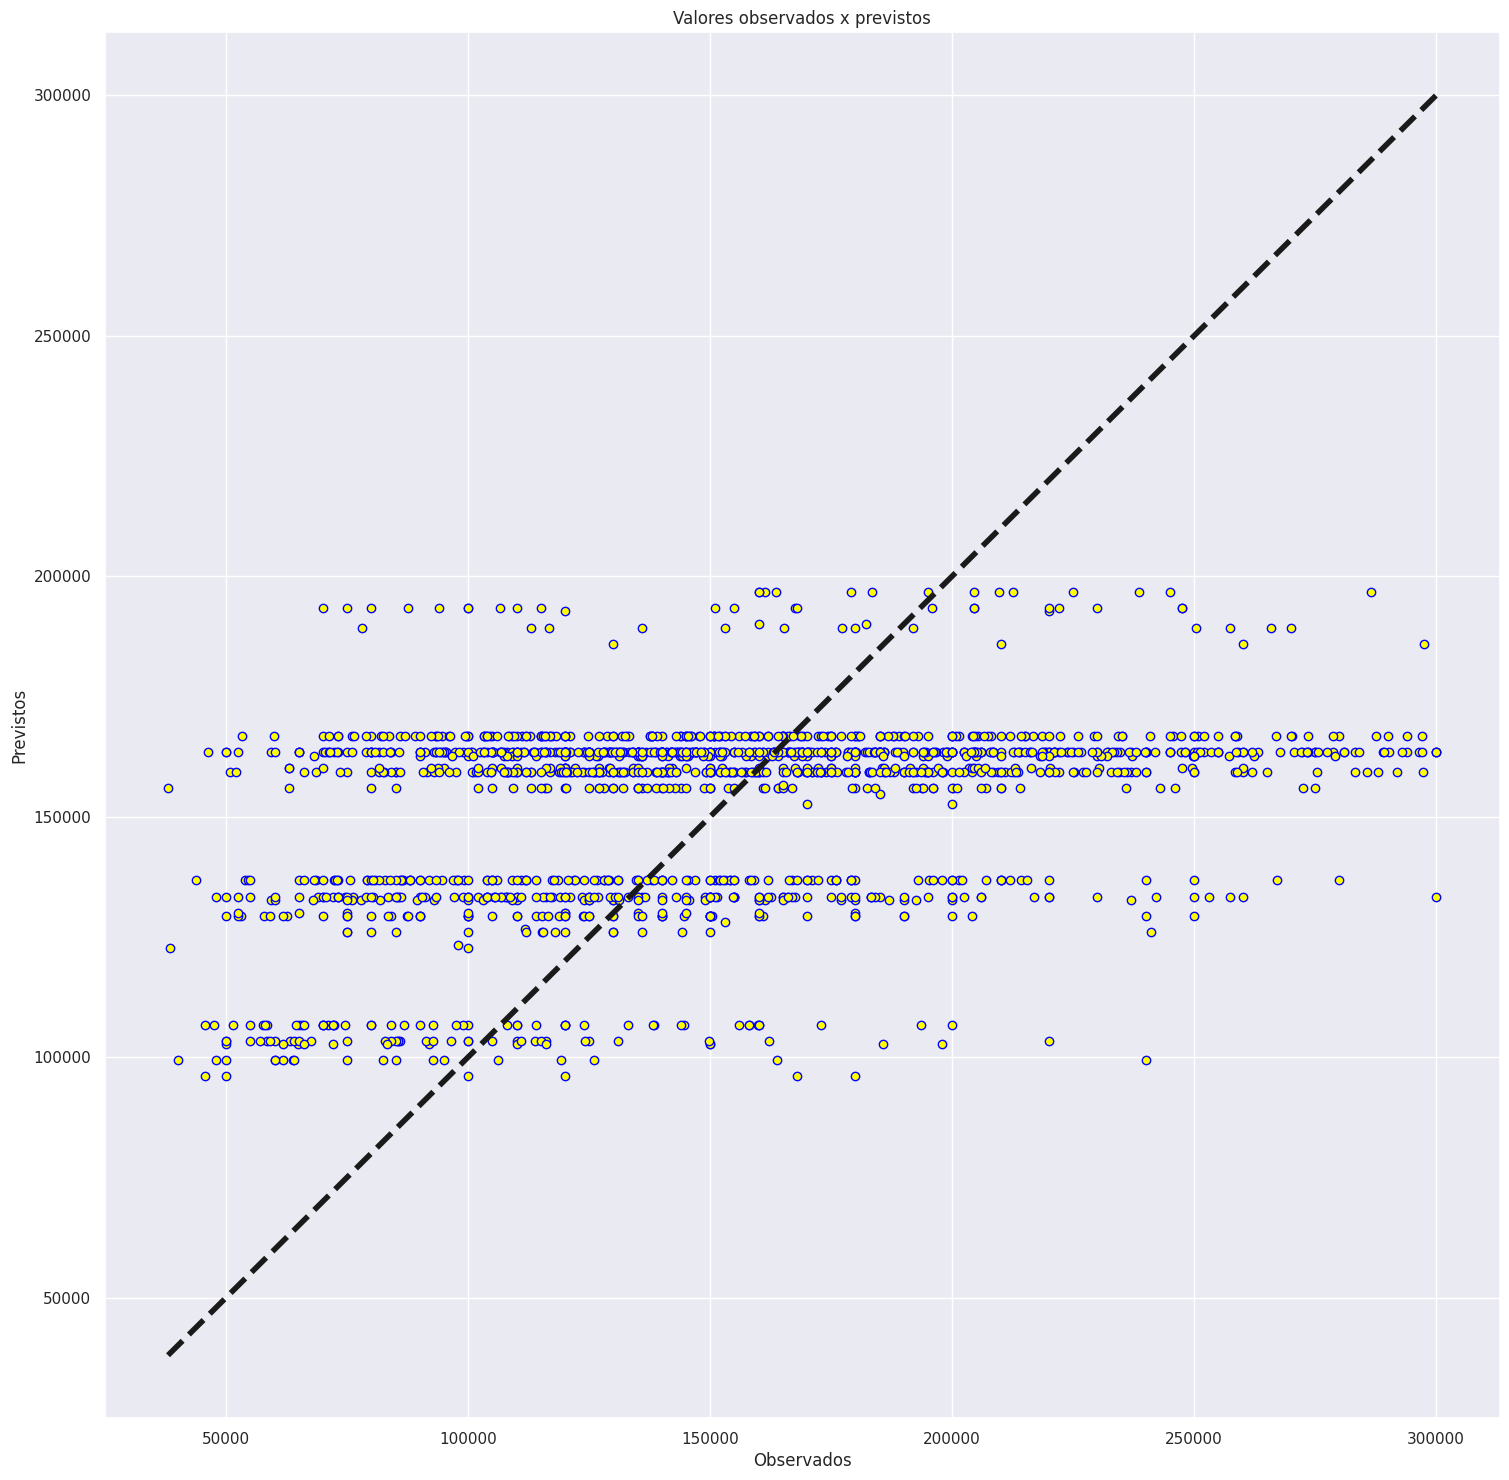

In [34]:
modelo = LinearRegression()

teste_size = 0.25
seed = 7

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = teste_size, random_state = seed)

modelo.fit(X_train, Y_train)
Y_pred = modelo.predict(X_test)

# Monta o gráfico das observações pelos valores previstos dos dados de teste
fig, ax = plt.subplots()
ax.scatter(Y_test, Y_pred, edgecolors='blue', color='yellow')
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
ax.set_title("Valores observados x previstos")
ax.set_xlabel('Observados')
ax.set_ylabel('Previstos')
plt.show()

In [35]:
r2 = r2_score(Y_test, Y_pred)
print("O R2 do modelo é:", r2)
print('Intercepto:', modelo.intercept_)

O R2 do modelo é: 0.1316022956875531
Intercepto: -6675004.053524757


In [36]:
atributos =  csv_pos_exploracao.columns[0:(colunas-1)]
atributos
coef_df = pd.DataFrame(modelo.coef_, atributos,columns=['Coeficiente'])
coef_df

,Coeficiente
work_year,3350.669114
experience_level,29982.170558
remote_ratio,-40.373867


# <font color="red">Discussão dos resultados obtidos</font>
## <font color="pink">Resultados</font>
O modelo gerado não é um modelo adequado para uso, pois não aprendeu o suficiente para prever adequadamente os salários. Há vários motivos possíveis observados para esse resultado, sendo os principais: poucos atributos preditores, dados muito "espalhados" e atributos sem correlação com o salário.
## <font color="pink">Tratamento de dados</font>
### <font color="black">Atributos preditores:</font>
O dataset encontrado, à primeira vista parecia ser um bom dataset, com vários possíveis atributos preditores e boas quantidade e qualidade de dados, porém durante a preparação dos dados, foi notado que poucas dessas colunas seriam relevantes para a construção do modelo. Vários desses atributos foram descartados por causa de dados inconsistentes, poucos registros com certas categorias como empresas fora dos EUA e tipos de contrato que não fossem Full Time.

Um dos atributos (job_title) parecia ser um bom preditor, porém nos primeiros testes, mesmo após tratar os nomes, transforma-los em colunas e adiciona-los ao dataset, a precisão do modelo foi ainda menor, então optamos por sua retirada do conjunto.

### <font color="black">Qualidade dos dados</font>
Como após os tratamentos foram encontrados poucos atributos preditores, os salários pareciam estar distribuidos de maneira aleatória, dificultando o aprendizado do modelo, deixando pouco espaço para encontrar como prever o salário.

### <font color="black">Correlação entre atributos</font>
Outra das dificuldade encontradas pelo modelo foi a falta de correlação entre os atributos preditores e o atributo alvo, complicando ainda mais para o modelo conseguir uma fórmula adequada para prever o salário recebido.